In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
retail_sales_df=pd.read_excel('/content/Online Retail.xlsx')
retail_sales_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Time,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 00:00:00,08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 00:00:00,08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 00:00:00,08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 00:00:00,08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 00:00:00,08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 00:00:00,12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 00:00:00,12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 00:00:00,12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 00:00:00,12:50:00,4.15,12680.0,France


In [ ]:
retail_sales_df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
Time,127365
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
retail_sales_df.dropna(inplace=True)
retail_sales_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Time,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 00:00:00,08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 00:00:00,08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 00:00:00,08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 00:00:00,08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 00:00:00,08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 00:00:00,12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 00:00:00,12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 00:00:00,12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 00:00:00,12:50:00,4.15,12680.0,France


In [ ]:
retail_sales_df.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,object
Time,object
UnitPrice,float64
CustomerID,float64
Country,object


In [ ]:
retail_sales_df['InvoiceDate']=pd.to_datetime(retail_sales_df['InvoiceDate']).dt.date
retail_sales_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Time,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,08:26:00,3.39,17850.0,United Kingdom


In [ ]:
retail_sales_df.describe()

,Quantity,UnitPrice,CustomerID
count,310074.000000,310074.000000,310074.000000
mean,12.543922,3.487246,15282.758155
std,283.197789,77.102026,1716.611302
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13875.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16788.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
# quantity can not be negative handling the negative values
retail_sales_df['Quantity']=retail_sales_df['Quantity'].abs()
retail_sales_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Time,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,12:50:00,4.15,12680.0,France


In [ ]:
# creating a new column total_price
retail_sales_df['Total Price']=retail_sales_df['Quantity']*retail_sales_df['UnitPrice']
retail_sales_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Time,UnitPrice,CustomerID,Country,Total Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
retail_sales_df.describe()

,Quantity,UnitPrice,CustomerID,Total Price
count,310074.000000,310074.000000,310074.000000,310074.000000
mean,14.126189,3.487246,15282.758155,24.649623
std,283.123274,77.102026,1716.611302,487.982790
min,1.000000,0.000000,12346.000000,0.000000
25%,2.000000,1.250000,13875.000000,4.950000
50%,6.000000,1.950000,15159.000000,12.500000
75%,12.000000,3.750000,16788.000000,19.800000
max,80995.000000,38970.000000,18287.000000,168469.600000


In [ ]:
#Recency: Days since last purchase.
recency=retail_sales_df.groupby('CustomerID')['InvoiceDate'].max().reset_index(name='Last Transaction Date')
max_date=retail_sales_df['InvoiceDate'].max()
recency['Days_Since_Last_Purchase']=recency['Last Transaction Date'].apply(lambda x: (max_date-x).days)
recency=recency[['CustomerID','Days_Since_Last_Purchase']]
recency.sort_values('Days_Since_Last_Purchase',ascending=True)

,CustomerID,Days_Since_Last_Purchase
744,13426.0,0
1424,14441.0,0
2004,15311.0,0
983,13777.0,0
2913,16705.0,0
...,...,...
3731,17968.0,373
3126,17025.0,373
962,13747.0,373
2031,15350.0,373


In [ ]:
#Frequency: Number of purchases.
frequency=retail_sales_df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index(name='Frequency').sort_values('Frequency',ascending=False)
frequency

,CustomerID,Frequency
1733,14911.0,183
293,12748.0,154
3644,17841.0,141
1535,14606.0,105
517,13089.0,99
...,...,...
2364,15866.0,1
2335,15825.0,1
2336,15826.0,1
2339,15830.0,1


In [ ]:
#Monetary / Avg Order Value (AOV): Average revenue per order.
monetary_value=retail_sales_df.groupby('CustomerID')[['Total Price','Quantity']].sum().reset_index()
monetary_value['Avearge Order Value (AOV)']=monetary_value['Total Price']/monetary_value['Quantity']
monetary_value[['CustomerID','Total Price','Quantity','Avearge Order Value (AOV)']]
monetary_value.sort_values('Avearge Order Value (AOV)',ascending=False)

,CustomerID,Total Price,Quantity,Avearge Order Value (AOV)
3396,17448.0,4287.63,1,4287.630000
3647,17846.0,2033.10,1,2033.100000
2041,15369.0,1592.49,1,1592.490000
111,12503.0,1126.00,1,1126.000000
564,13154.0,611.86,1,611.860000
...,...,...,...,...
913,13678.0,232.60,924,0.251732
585,13189.0,127.00,526,0.241445
1868,15118.0,244.80,1440,0.170000
376,12875.0,49.47,291,0.170000


In [ ]:
# combining all metrics
combine_data=recency.merge(frequency,on='CustomerID',how='inner').merge(monetary_value,on='CustomerID',how='inner')
combine_data

,CustomerID,Days_Since_Last_Purchase,Frequency,Total Price,Quantity,Avearge Order Value (AOV)
0,12346.0,325,2,154367.20,148430,1.040000
1,12347.0,2,6,3015.68,1782,1.692301
2,12348.0,75,3,904.44,1087,0.832052
3,12350.0,310,1,334.40,197,1.697462
4,12352.0,36,11,3466.67,602,5.758588
...,...,...,...,...,...,...
3929,18280.0,277,1,180.60,45,4.013333
3930,18281.0,180,1,80.82,54,1.496667
3931,18282.0,7,3,179.50,108,1.662037
3932,18283.0,3,11,1328.67,884,1.503020


In [ ]:
# calcualtion of customer asscociation with the company to calculate the LTV
lifespan_customers=retail_sales_df.groupby('CustomerID')['InvoiceDate'].agg(['min','max']).reset_index()
lifespan_customers.rename(columns={'min':'first_purchase_date','max':'last_purchase_date'},inplace=True)
lifespan_customers['first_purchase_date']=pd.to_datetime(lifespan_customers['first_purchase_date'])
lifespan_customers['last_purchase_date']=pd.to_datetime(lifespan_customers['last_purchase_date'])
lifespan_customers['Customer_Lifespan']=np.where((lifespan_customers['last_purchase_date']-lifespan_customers['first_purchase_date']).dt.days>0,
(lifespan_customers['last_purchase_date']-lifespan_customers['first_purchase_date']).dt.days,1)
lifespan_customers['Customer_Catgory']=np.where(lifespan_customers['Customer_Lifespan']==1,'New Customer','Old Customer')
lifespan_customers

,CustomerID,first_purchase_date,last_purchase_date,Customer_Lifespan,Customer_Catgory
0,12346.0,2011-01-18,2011-01-18,1,New Customer
1,12347.0,2010-12-07,2011-12-07,365,Old Customer
2,12348.0,2011-01-25,2011-09-25,243,Old Customer
3,12350.0,2011-02-02,2011-02-02,1,New Customer
4,12352.0,2011-02-16,2011-11-03,260,Old Customer
...,...,...,...,...,...
3929,18280.0,2011-03-07,2011-03-07,1,New Customer
3930,18281.0,2011-06-12,2011-06-12,1,New Customer
3931,18282.0,2011-08-05,2011-12-02,119,Old Customer
3932,18283.0,2011-01-06,2011-12-06,334,Old Customer


In [ ]:
customer_combine_data=combine_data.merge(lifespan_customers,on='CustomerID',how='inner')
customer_combine_data['LTV']=customer_combine_data['Avearge Order Value (AOV)']*customer_combine_data['Frequency']*customer_combine_data['Customer_Lifespan']
customer_combine_data

,CustomerID,Days_Since_Last_Purchase,Frequency,Total Price,Quantity,Avearge Order Value (AOV),first_purchase_date,last_purchase_date,Customer_Lifespan,Customer_Catgory,LTV
0,12346.0,325,2,154367.20,148430,1.040000,2011-01-18,2011-01-18,1,New Customer,2.080000
1,12347.0,2,6,3015.68,1782,1.692301,2010-12-07,2011-12-07,365,Old Customer,3706.138721
2,12348.0,75,3,904.44,1087,0.832052,2011-01-25,2011-09-25,243,Old Customer,606.565557
3,12350.0,310,1,334.40,197,1.697462,2011-02-02,2011-02-02,1,New Customer,1.697462
4,12352.0,36,11,3466.67,602,5.758588,2011-02-16,2011-11-03,260,Old Customer,16469.561794
...,...,...,...,...,...,...,...,...,...,...,...
3929,18280.0,277,1,180.60,45,4.013333,2011-03-07,2011-03-07,1,New Customer,4.013333
3930,18281.0,180,1,80.82,54,1.496667,2011-06-12,2011-06-12,1,New Customer,1.496667
3931,18282.0,7,3,179.50,108,1.662037,2011-08-05,2011-12-02,119,Old Customer,593.347222
3932,18283.0,3,11,1328.67,884,1.503020,2011-01-06,2011-12-06,334,Old Customer,5522.096810


In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
df=customer_combine_data.copy()
df

,CustomerID,Days_Since_Last_Purchase,Frequency,Total Price,Quantity,Avearge Order Value (AOV),first_purchase_date,last_purchase_date,Customer_Lifespan,Customer_Catgory,LTV
0,12346.0,325,2,154367.20,148430,1.040000,2011-01-18,2011-01-18,1,New Customer,2.080000
1,12347.0,2,6,3015.68,1782,1.692301,2010-12-07,2011-12-07,365,Old Customer,3706.138721
2,12348.0,75,3,904.44,1087,0.832052,2011-01-25,2011-09-25,243,Old Customer,606.565557
3,12350.0,310,1,334.40,197,1.697462,2011-02-02,2011-02-02,1,New Customer,1.697462
4,12352.0,36,11,3466.67,602,5.758588,2011-02-16,2011-11-03,260,Old Customer,16469.561794
...,...,...,...,...,...,...,...,...,...,...,...
3929,18280.0,277,1,180.60,45,4.013333,2011-03-07,2011-03-07,1,New Customer,4.013333
3930,18281.0,180,1,80.82,54,1.496667,2011-06-12,2011-06-12,1,New Customer,1.496667
3931,18282.0,7,3,179.50,108,1.662037,2011-08-05,2011-12-02,119,Old Customer,593.347222
3932,18283.0,3,11,1328.67,884,1.503020,2011-01-06,2011-12-06,334,Old Customer,5522.096810


In [ ]:
# ensure dates
df['first_purchase_date']=pd.to_datetime(df['first_purchase_date'])
df['last_purchase_date']=pd.to_datetime(df['last_purchase_date'])

In [ ]:
df['Purchase_Rate_per_day']=df['Frequency']/df['Customer_Lifespan']
df['Avg_Interpurchase_Days']=df['Customer_Lifespan']/df['Frequency'].replace(0,1)
df['Spend_per_day']=df['Total Price']/df['Customer_Lifespan']
df

,CustomerID,Days_Since_Last_Purchase,Frequency,Total Price,Quantity,Avearge Order Value (AOV),first_purchase_date,last_purchase_date,Customer_Lifespan,Customer_Catgory,LTV,Purchase_Rate_per_day,Avg_Interpurchase_Days,Spend_per_day
0,12346.0,325,2,154367.20,148430,1.040000,2011-01-18,2011-01-18,1,New Customer,2.080000,2.000000,0.500000,154367.200000
1,12347.0,2,6,3015.68,1782,1.692301,2010-12-07,2011-12-07,365,Old Customer,3706.138721,0.016438,60.833333,8.262137
2,12348.0,75,3,904.44,1087,0.832052,2011-01-25,2011-09-25,243,Old Customer,606.565557,0.012346,81.000000,3.721975
3,12350.0,310,1,334.40,197,1.697462,2011-02-02,2011-02-02,1,New Customer,1.697462,1.000000,1.000000,334.400000
4,12352.0,36,11,3466.67,602,5.758588,2011-02-16,2011-11-03,260,Old Customer,16469.561794,0.042308,23.636364,13.333346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3929,18280.0,277,1,180.60,45,4.013333,2011-03-07,2011-03-07,1,New Customer,4.013333,1.000000,1.000000,180.600000
3930,18281.0,180,1,80.82,54,1.496667,2011-06-12,2011-06-12,1,New Customer,1.496667,1.000000,1.000000,80.820000
3931,18282.0,7,3,179.50,108,1.662037,2011-08-05,2011-12-02,119,Old Customer,593.347222,0.025210,39.666667,1.508403
3932,18283.0,3,11,1328.67,884,1.503020,2011-01-06,2011-12-06,334,Old Customer,5522.096810,0.032934,30.363636,3.978054


In [ ]:
# log transforms (stabilize skew)
df['Total Price']=np.log1p(df['Total Price'])
df['Avearge Order Value (AOV)']=np.log1p(df['Avearge Order Value (AOV)'])

In [ ]:
# encode category
df['Customer_Category']=df['Customer_Catgory'].astype('category')
df=pd.get_dummies(df,columns=['Customer_Catgory'],drop_first=True,dtype=int)


In [ ]:
df

,CustomerID,Days_Since_Last_Purchase,Frequency,Total Price,Quantity,Avearge Order Value (AOV),first_purchase_date,last_purchase_date,Customer_Lifespan,LTV,Purchase_Rate_per_day,Avg_Interpurchase_Days,Spend_per_day,Customer_Category,Customer_Catgory_Old Customer
0,12346.0,325,2,11.947096,148430,0.712950,2011-01-18,2011-01-18,1,2.080000,2.000000,0.500000,154367.200000,New Customer,0
1,12347.0,2,6,8.011912,1782,0.990396,2010-12-07,2011-12-07,365,3706.138721,0.016438,60.833333,8.262137,Old Customer,1
2,12348.0,75,3,6.808421,1087,0.605436,2011-01-25,2011-09-25,243,606.565557,0.012346,81.000000,3.721975,Old Customer,1
3,12350.0,310,1,5.815324,197,0.992311,2011-02-02,2011-02-02,1,1.697462,1.000000,1.000000,334.400000,New Customer,0
4,12352.0,36,11,8.151238,602,1.910814,2011-02-16,2011-11-03,260,16469.561794,0.042308,23.636364,13.333346,Old Customer,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3929,18280.0,277,1,5.201806,45,1.612101,2011-03-07,2011-03-07,1,4.013333,1.000000,1.000000,180.600000,New Customer,0
3930,18281.0,180,1,4.404522,54,0.914957,2011-06-12,2011-06-12,1,1.496667,1.000000,1.000000,80.820000,New Customer,0
3931,18282.0,7,3,5.195731,108,0.979092,2011-08-05,2011-12-02,119,593.347222,0.025210,39.666667,1.508403,Old Customer,1
3932,18283.0,3,11,7.192686,884,0.917498,2011-01-06,2011-12-06,334,5522.096810,0.032934,30.363636,3.978054,Old Customer,1


In [ ]:
df.columns

Index(['CustomerID', 'Days_Since_Last_Purchase', 'Frequency', 'Total Price',
       'Quantity', 'Avearge Order Value (AOV)', 'first_purchase_date',
       'last_purchase_date', 'Customer_Lifespan', 'LTV',
       'Purchase_Rate_per_day', 'Avg_Interpurchase_Days', 'Spend_per_day',
       'Customer_Category', 'Customer_Catgory_Old Customer'],
      dtype='object')

In [ ]:
df.rename(columns={'Customer_Catgory_Old Customer':'Customer_Category_Dummies'},inplace=True)


In [ ]:
df.head()

,CustomerID,Days_Since_Last_Purchase,Frequency,Total Price,Quantity,Avearge Order Value (AOV),first_purchase_date,last_purchase_date,Customer_Lifespan,LTV,Purchase_Rate_per_day,Avg_Interpurchase_Days,Spend_per_day,Customer_Category,Customer_Category_Dummies
0,12346.0,325,2,11.947096,148430,0.712950,2011-01-18,2011-01-18,1,2.080000,2.000000,0.500000,154367.200000,New Customer,0
1,12347.0,2,6,8.011912,1782,0.990396,2010-12-07,2011-12-07,365,3706.138721,0.016438,60.833333,8.262137,Old Customer,1
2,12348.0,75,3,6.808421,1087,0.605436,2011-01-25,2011-09-25,243,606.565557,0.012346,81.000000,3.721975,Old Customer,1
3,12350.0,310,1,5.815324,197,0.992311,2011-02-02,2011-02-02,1,1.697462,1.000000,1.000000,334.400000,New Customer,0
4,12352.0,36,11,8.151238,602,1.910814,2011-02-16,2011-11-03,260,16469.561794,0.042308,23.636364,13.333346,Old Customer,1


In [ ]:
new_df=df[['Days_Since_Last_Purchase','Frequency','Total Price','Quantity','Avearge Order Value (AOV)','Customer_Lifespan',
          'Purchase_Rate_per_day',	'Avg_Interpurchase_Days',	'Spend_per_day','Customer_Category_Dummies','LTV']].corr()
new_df

,Days_Since_Last_Purchase,Frequency,Total Price,Quantity,Avearge Order Value (AOV),Customer_Lifespan,Purchase_Rate_per_day,Avg_Interpurchase_Days,Spend_per_day,Customer_Category_Dummies,LTV
Days_Since_Last_Purchase,1.000000,-0.303970,-0.440276,-0.119121,0.141440,-0.560974,0.397249,-0.364097,0.049331,-0.424594,-0.278968
Frequency,-0.303970,1.000000,0.568078,0.431257,-0.032327,0.528047,-0.264639,0.006506,-0.019578,0.324164,0.912528
Total Price,-0.440276,0.568078,1.000000,0.397866,-0.074995,0.670944,-0.512602,0.252031,0.088617,0.595154,0.497797
Quantity,-0.119121,0.431257,0.397866,1.000000,-0.061093,0.202700,-0.077394,-0.009849,0.387453,0.109038,0.363902
Avearge Order Value (AOV),0.141440,-0.032327,-0.074995,-0.061093,1.000000,-0.082319,0.105301,-0.075539,0.079758,-0.091183,0.074842
Customer_Lifespan,-0.560974,0.528047,0.670944,0.202700,-0.082319,1.000000,-0.683858,0.656357,-0.064037,0.710699,0.501450
Purchase_Rate_per_day,0.397249,-0.264639,-0.512602,-0.077394,0.105301,-0.683858,1.000000,-0.623771,0.164719,-0.897766,-0.220563
Avg_Interpurchase_Days,-0.364097,0.006506,0.252031,-0.009849,-0.075539,0.656357,-0.623771,1.000000,-0.058946,0.630186,0.022991
Spend_per_day,0.049331,-0.019578,0.088617,0.387453,0.079758,-0.064037,0.164719,-0.058946,1.000000,-0.087592,-0.016826
Customer_Category_Dummies,-0.424594,0.324164,0.595154,0.109038,-0.091183,0.710699,-0.897766,0.630186,-0.087592,1.000000,0.257660


In [ ]:
# choose features
features=['Frequency','Total Price','Quantity','Customer_Lifespan','Days_Since_Last_Purchase','Customer_Category_Dummies'
          ]

In [ ]:
df[['Frequency','Total Price','Quantity','Customer_Lifespan','Days_Since_Last_Purchase','Customer_Category_Dummies']].skew().sort_values(ascending=False)

,0
Quantity,20.122037
Frequency,9.615137
Days_Since_Last_Purchase,0.784205
Customer_Lifespan,0.605118
Total Price,0.090578
Customer_Category_Dummies,-0.578089


In [ ]:
# handling the skewness
for col in ['Frequency','Quantity','Customer_Lifespan','Days_Since_Last_Purchase','Customer_Category_Dummies']:
          df[col]=np.log1p(df[col])

In [ ]:
df[['Frequency','Total Price','Quantity','Customer_Lifespan','Days_Since_Last_Purchase','Customer_Category_Dummies']].skew().sort_values(ascending=False)

,0
Frequency,1.200280
Total Price,0.090578
Quantity,-0.257836
Customer_Lifespan,-0.271824
Customer_Category_Dummies,-0.578089
Days_Since_Last_Purchase,-1.135974


In [ ]:
import numpy as np

# Reflect and log-transform
max_val = df['Days_Since_Last_Purchase'].max()
df['Days_Since_Last_Purchase'] = np.log1p(max_val + 1 - df['Days_Since_Last_Purchase'])


In [ ]:
import numpy as np

df['Frequency'] = np.log1p(df['Frequency'])



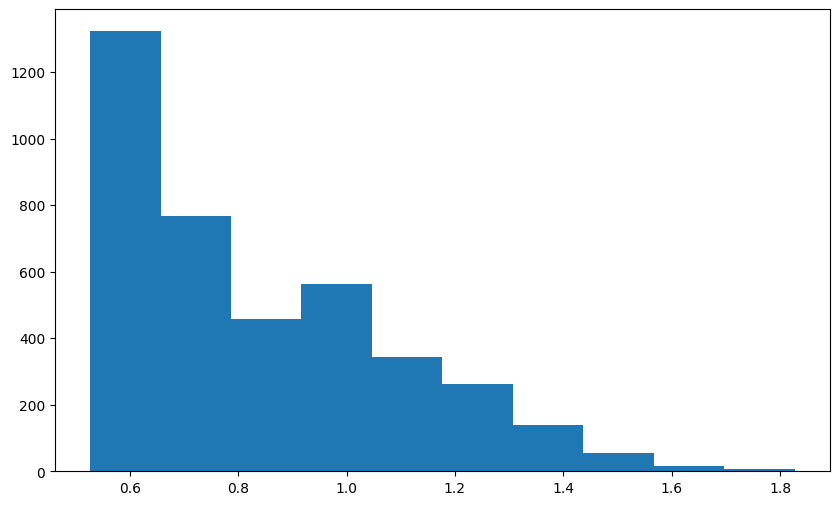

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(df['Frequency'])
plt.show()

In [ ]:
y=df['LTV']
y_log=np.log1p(y)

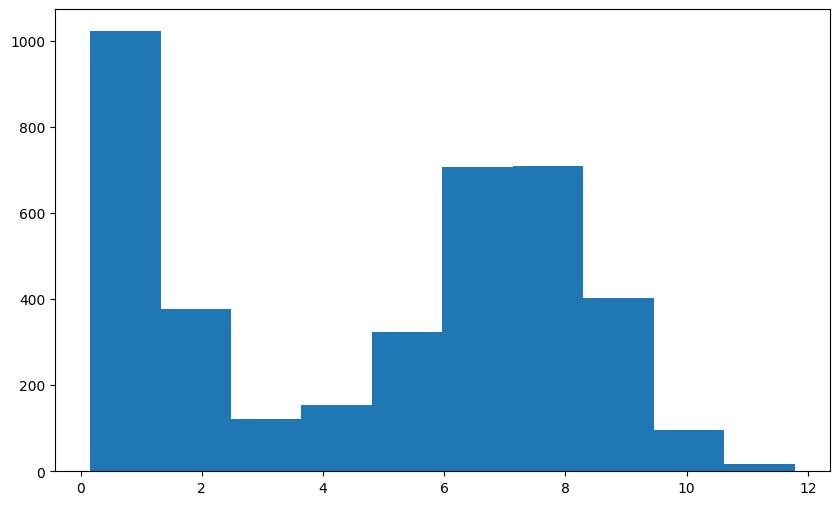

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(y_log)
plt.show()

In [ ]:
# time-based split (preferred): e.g. use last_purchase_date quantile
cut_off=df['last_purchase_date'].quantile(0.8)
train_df=df[df['last_purchase_date']<cut_off]
test_df=df[df['last_purchase_date']>cut_off]

In [ ]:
df[features].head()

,Frequency,Total Price,Quantity,Customer_Lifespan,Days_Since_Last_Purchase,Customer_Category_Dummies
0,0.741276,11.947096,11.907875,0.693147,0.759571,0.000000
1,1.080418,8.011912,7.486053,5.902633,1.920687,0.693147
2,0.869742,6.808421,6.992096,5.497168,1.279133,0.693147
3,0.526589,5.815324,5.288267,0.693147,0.781370,0.000000
4,1.248441,8.151238,6.401917,5.564520,1.461712,0.693147


In [ ]:
x_train = train_df[features]
x_test = test_df[features]
y_train = np.log1p(train_df['LTV'])
y_test = np.log1p(test_df['LTV'])

In [ ]:
model=XGBRegressor(objective='reg:squarederror',random_state=42,n_jobs=-1,n_estimators=20,max_depth=4)
model.fit(x_train,y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=20,
             n_jobs=-1, num_parallel_tree=None, ...)

In [ ]:
# predict and back-transform
y_pred_log=model.predict(x_test)
y_pred=np.expm1(y_pred_log)
print(y_pred_log.min(),y_pred_log.max())

0.4793311 10.437875


In [ ]:
y_log.min(),y_log.max()

(0.15700374880966475, 11.782814877231807)

In [ ]:
# evaluate (in original scale)
print("MAE:", mean_absolute_error(np.expm1(y_test), y_pred))
print("R2:",r2_score(np.expm1(y_test), y_pred))
print("RMSE:", np.sqrt(mean_squared_error(np.expm1(y_test), y_pred)))

MAE: 1819.5168287610563
R2: 0.6120360097163597
RMSE: 7210.571075183093


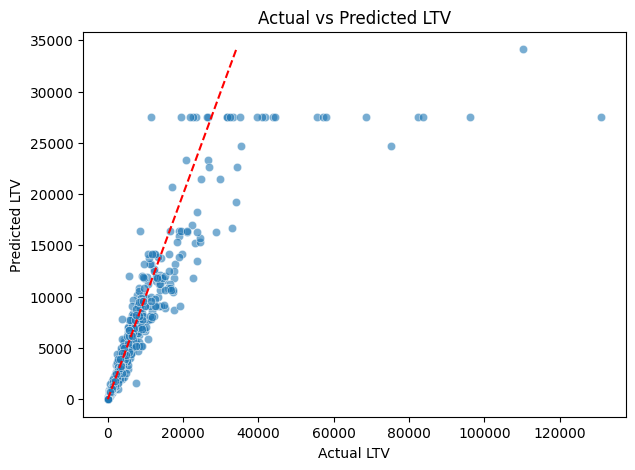

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,5))
sns.scatterplot(x=np.expm1(y_test), y=y_pred, alpha=0.6)
plt.xlabel("Actual LTV")
plt.ylabel("Predicted LTV")
plt.title("Actual vs Predicted LTV")
plt.plot([0, max(y_pred)], [0, max(y_pred)], color='red', linestyle='--')
plt.show()


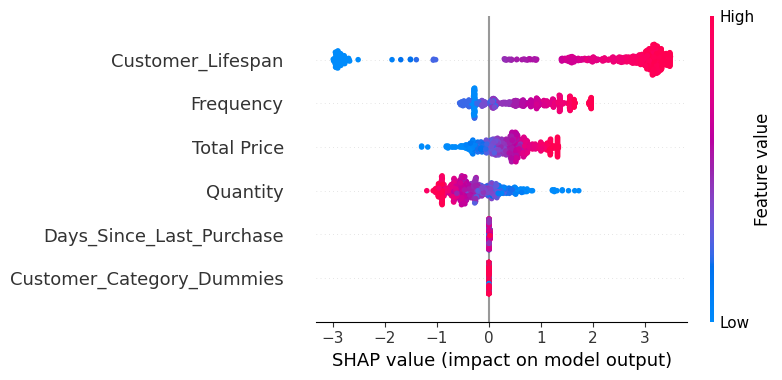

In [ ]:
# interpretability
import shap
explainer = shap.Explainer(model)
shap_values = explainer(x_test)
shap.summary_plot(shap_values, x_test)


In [ ]:
# Predict for full dataset
X_full = df[features]  # your original features
y_pred_full = model.predict(X_full)

df['predicted_LTV'] = y_pred_full
df['LTV_segment'] = pd.qcut(df['predicted_LTV'], q=3, labels=['Low', 'Medium', 'High'])


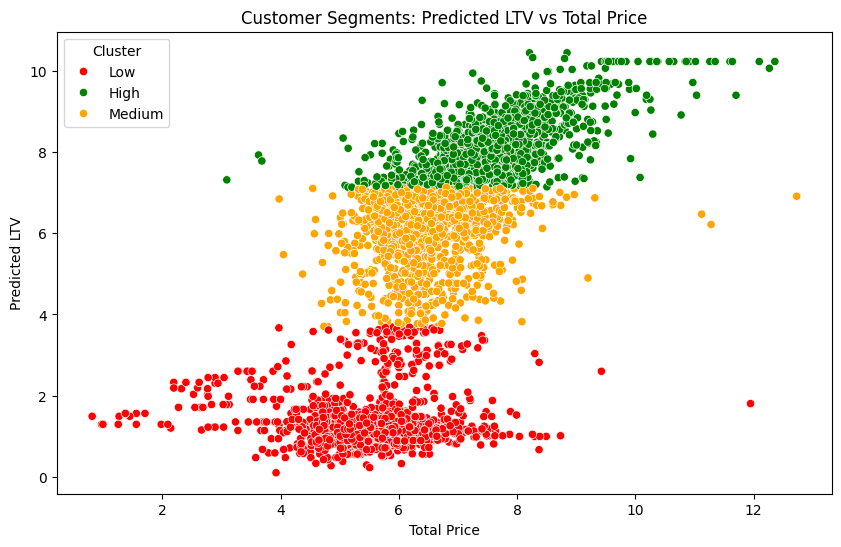

LTV_cluster_label
Low       1534
High      1210
Medium    1190
Name: count, dtype: int64


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# Assume df already has 'predicted_LTV' and optionally 'Frequency'
# -----------------------------

# 1. Prepare data
X = df['predicted_LTV'].values.reshape(-1,1)

# Optional: scale data for stability
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Fit K-Means with multiple initializations
kmeans = KMeans(n_clusters=3, n_init=50, random_state=42)
df['LTV_cluster'] = kmeans.fit_predict(X_scaled)

# 3. Map clusters to Low/Medium/High
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_).flatten()
sorted_idx = np.argsort(cluster_centers)
label_map = {sorted_idx[0]: 'Low', sorted_idx[1]: 'Medium', sorted_idx[2]: 'High'}
df['LTV_cluster_label'] = df['LTV_cluster'].map(label_map)

# 4. Scatter plot: Predicted LTV vs Frequency
if 'Total Price' in df.columns:
    plt.figure(figsize=(10,6))
    sns.scatterplot(
        x='Total Price',
        y='predicted_LTV',
        hue='LTV_cluster_label',
        data=df,
        palette={'Low':'red','Medium':'orange','High':'green'}
    )
    plt.title("Customer Segments: Predicted LTV vs Total Price")
    plt.xlabel("Total Price")
    plt.ylabel("Predicted LTV")
    plt.legend(title='Cluster')
    plt.show()

# 5. Optional: Inspect cluster counts
print(df['LTV_cluster_label'].value_counts())


In [ ]:
import matplotlib.pyplot as plt
from xgboost import plot_tree
from matplotlib.pylab import rcParams

In [ ]:
rcParams['figure.figsize']=30,30

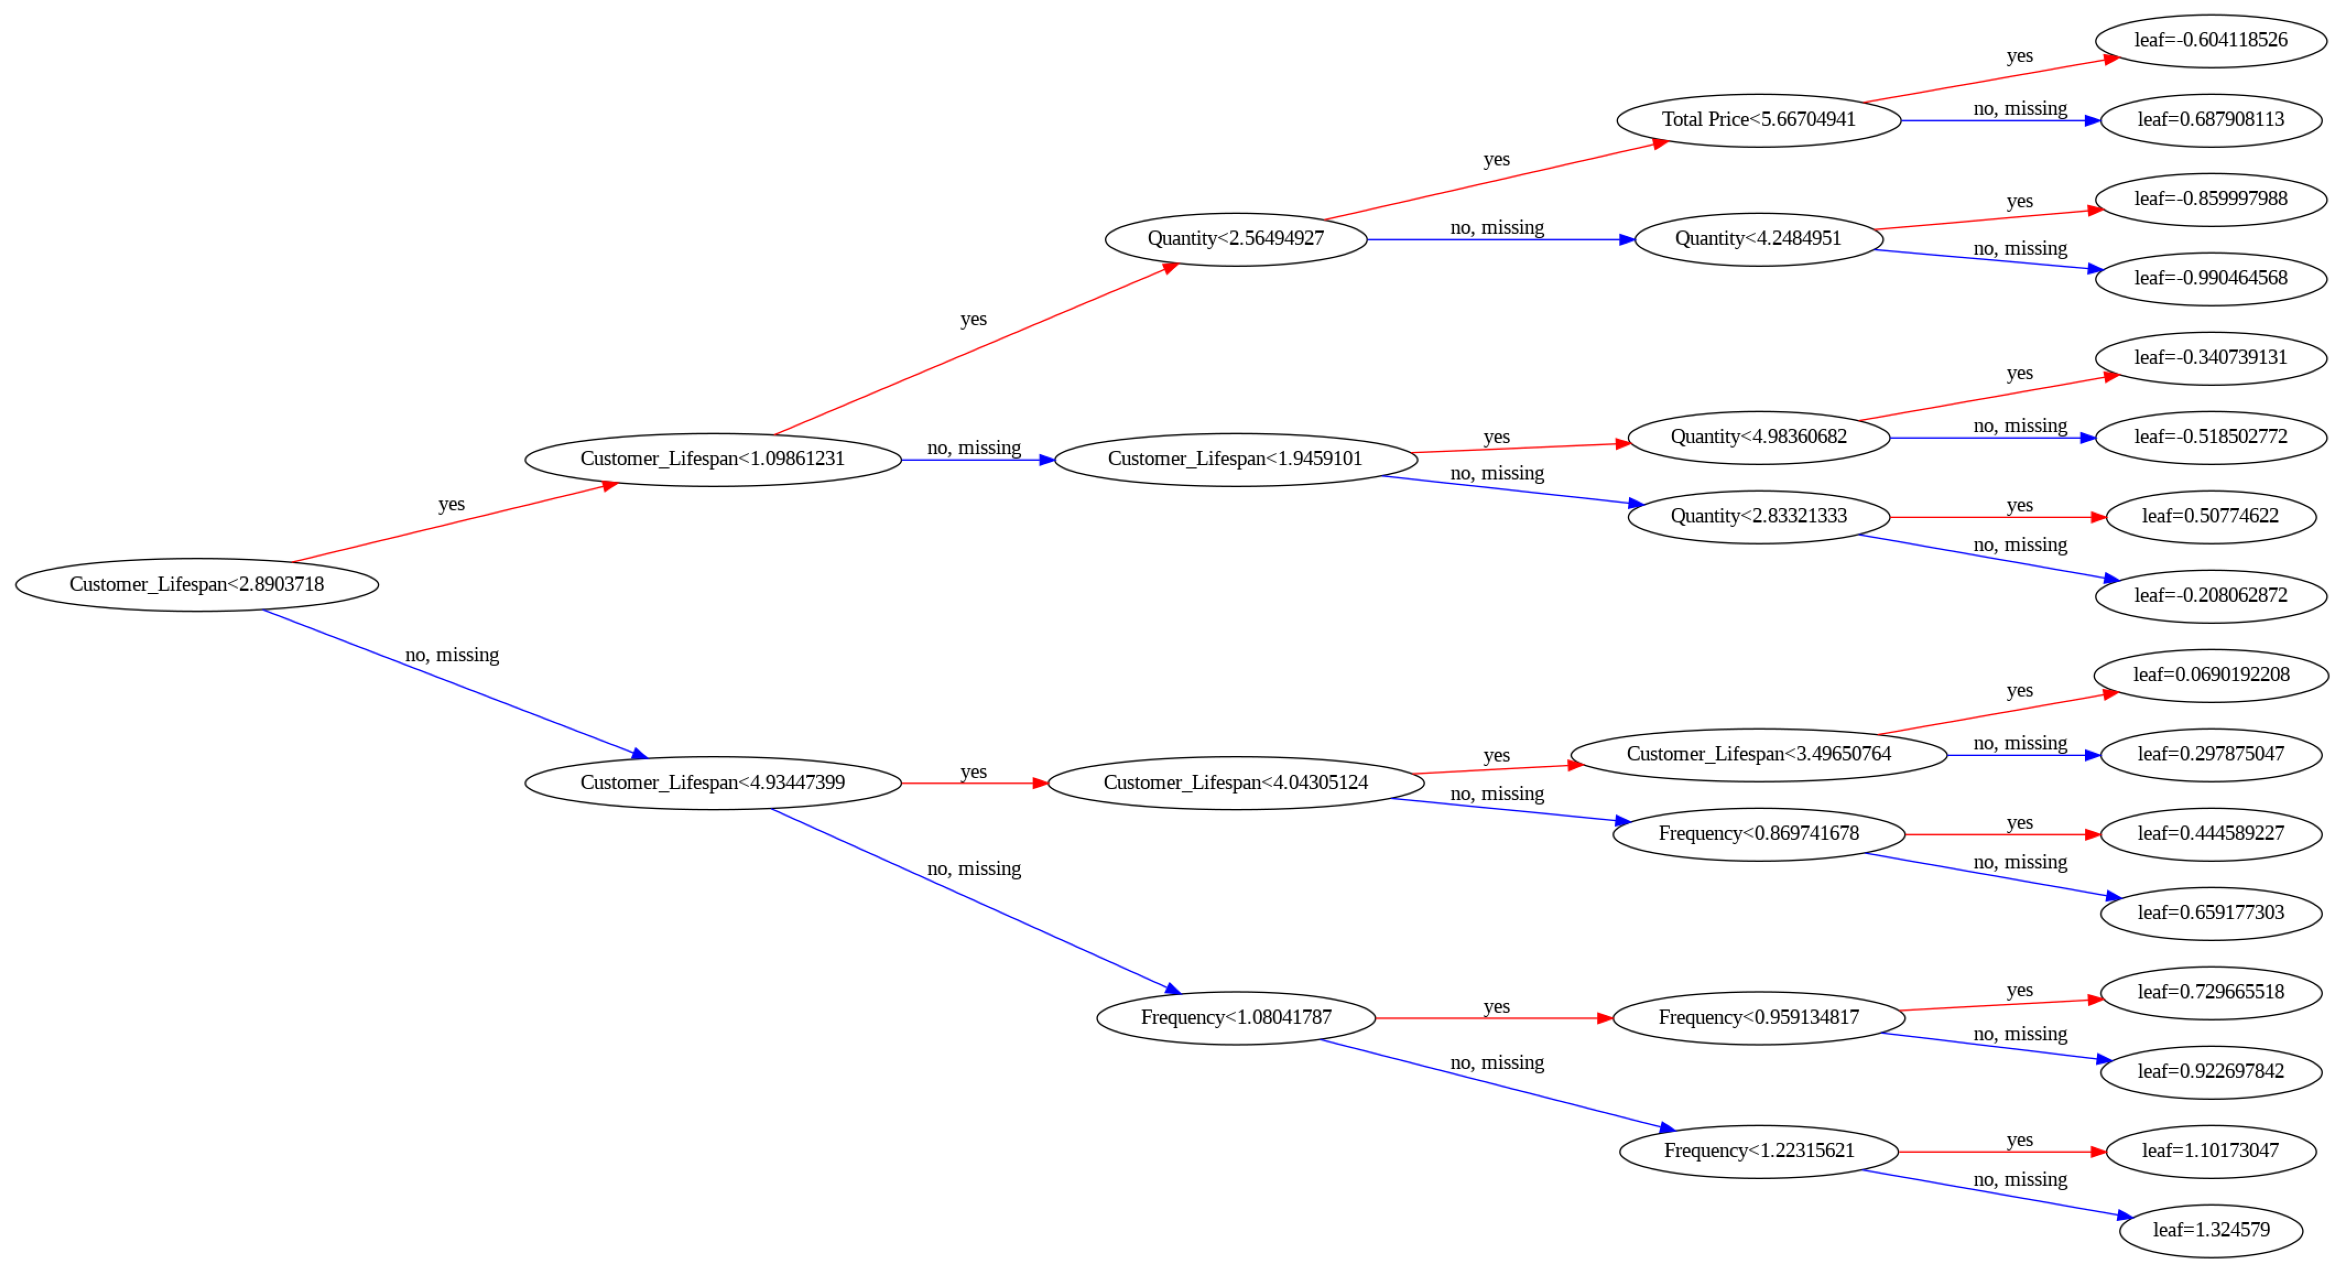

In [ ]:
plot_tree(model,rankdir='LR');